In [1]:
# importing packages
import pandas as pd
import numpy as np    
import statsmodels.api as sm
import datetime
import pmdarima as pm

from IPython.display import display, HTML, display_html
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [8]:
df = pd.read_csv('data/modelling_data.csv',index_col=0)

In [10]:
df.index

Index(['1986-02-14', '1986-02-21', '1986-02-28', '1986-03-07', '1986-03-14',
       '1986-03-21', '1986-03-28', '1986-04-04', '1986-04-11', '1986-04-18',
       ...
       '2019-07-19', '2019-07-26', '2019-08-02', '2019-08-09', '2019-08-16',
       '2019-08-23', '2019-08-30', '2019-09-06', '2019-09-13', '2019-09-20'],
      dtype='object', name='ds', length=1754)

In [11]:
df.index = pd.to_datetime(df.index)

In [81]:
train = df['ts'][0:1702]
test = df['ts'][1702:1754]

In [82]:
len(test)

52

In [83]:
# Auto ARIMA using pyramid
from pmdarima.arima import auto_arima

arima_mod = auto_arima(train, start_p=1,d=1,start_q=0,max_p=1,max_d=1,max_q=0,
                        start_P=1,D=1,start_Q=0,max_P=1,max_D=1,max_Q=1,m=52,
                        seasonal=True,trace=True,error_action='warn',
                        suppress_warnings=True,stepwise=True,random_state=20,n_fits=10)
arima_mod.summary()

Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=7612.002, BIC=7633.633, Fit time=34.014 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=8071.770, BIC=8082.586, Fit time=3.037 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=7107.652, BIC=7123.876, Fit time=94.282 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=7109.538, BIC=7131.170, Fit time=121.512 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 1, 52); AIC=7053.001, BIC=7074.633, Fit time=97.014 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=7054.805, BIC=7081.844, Fit time=110.456 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=8012.273, BIC=8028.497, Fit time=4.401 seconds
Total fit time: 464.722 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1702
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 52)   Log Likelihood               -3522.501
Date:                            Wed, 02 Oct 2019   AIC                           7053.001
Time:                                    22:55:07   BIC                           7074.633
Sample:                                         0   HQIC                          7061.022
                                           - 1702                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0002      0.004      0.040      0.968      -0.008       0.008
ar.L1          0.1839      0.012     15.254      0.000       0.160       0.208
ma.S.L52      -0.9989      0.597     -1.673      0.094      -2.169       0.171
sigma2         3.7623      2.212      1.701      0.089      -0.573       8.098
===================================================================================
Ljung-Box (Q):                      102.52   Jarque-Bera (JB):              4193.83
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.61   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
pred = pd.DataFrame(arima_mod.predict(n_periods=52),index=test.index)
pred.columns=['forecast']

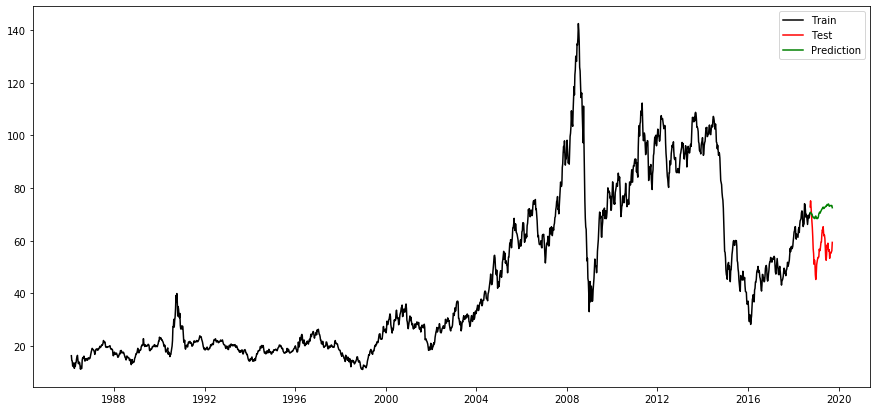

In [86]:
plt.figure(figsize=(15,7))
plt.plot(train,color='black',label='Train')
plt.plot(test,color='red',label='Test')
plt.plot(pred,color='green',label='Prediction')
plt.legend(loc='upper right')
plt.show()

In [87]:
npredict =df.ts['2018'].shape[0]
nobs = df.ts.shape[0]

/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/pandas/core/indexing.py:947: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]
/Applications/anaconda3/envs/learn-env/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#

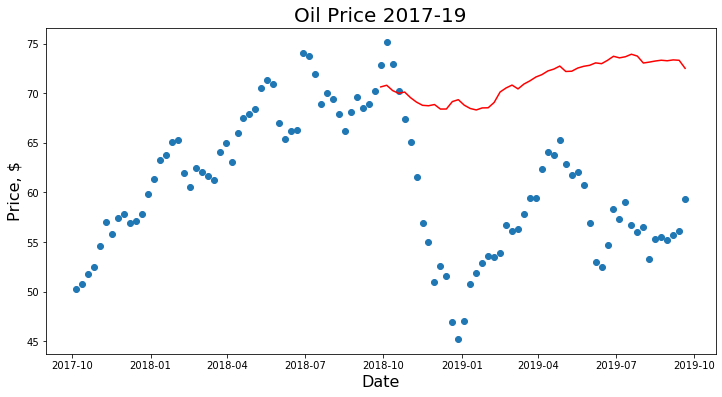

In [88]:
fig, ax = plt.subplots(figsize=(12,6))
npre = 52

plt.xlabel('Date',fontsize=16)
plt.ylabel('Price, $',fontsize=16)
plt.title('Oil Price 2017-19', fontsize=20)

ax.plot(df.index[-npredict-npre+1:], df.ix[-npredict-npre+1:, 'ts'], 'o', label='Observed')
ax.plot(pred.index[-npredict-npre+1:], pred.ix[-npredict-npre+1:, 'forecast'], 'red', label='Forecast')
# plt.savefig('forecasted_vs_actual.png', bbox_inches='tight')
plt.show()